# Sistema de recomendación...
### Carga de datos de Movie Lens...

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [130]:
df = pd.read_csv("datasets/u.dat", sep = "::", header = None)
df.head()

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [131]:
df.shape

(10000054, 4)

In [132]:
df.columns = ["UserID", "ItemID", "Rating", "TimeStamp"]

In [133]:
df.head()

,UserID,ItemID,Rating,TimeStamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


## Análisis exploratorio de los datos...

(array([  94988.,  384180.,  118278.,  790306.,  370178., 2356676.,
         879764., 2875850.,  585022., 1544812.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

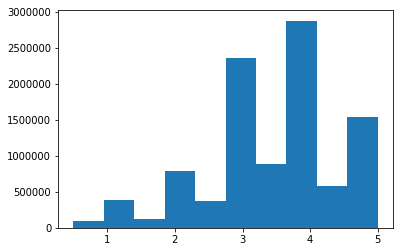

In [134]:
plt.hist(df.Rating)

(array([ 173205., 1291815.,  274462., 1493676., 1315145.,  878299.,
        1016042., 1490856., 1046097., 1020457.]),
 array([7.89652009e+08, 8.33799982e+08, 8.77947954e+08, 9.22095927e+08,
        9.66243900e+08, 1.01039187e+09, 1.05453985e+09, 1.09868782e+09,
        1.14283579e+09, 1.18698376e+09, 1.23113174e+09]),
 <a list of 10 Patch objects>)

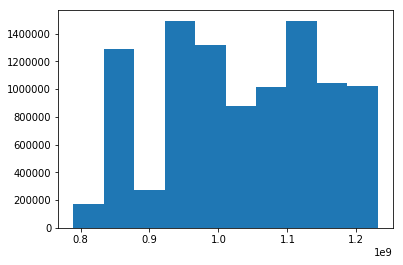

In [135]:
plt.hist(df.TimeStamp)

In [136]:
df.groupby(["Rating"])["UserID"].count()

Rating
0.5      94988
1.0     384180
1.5     118278
2.0     790306
2.5     370178
3.0    2356676
3.5     879764
4.0    2875850
4.5     585022
5.0    1544812
Name: UserID, dtype: int64

(array([9.951e+03, 3.900e+02, 1.710e+02, 7.900e+01, 3.700e+01, 1.800e+01,
        1.400e+01, 8.000e+00, 5.000e+00, 4.000e+00]),
 array([1.00000e+00, 3.48730e+03, 6.97360e+03, 1.04599e+04, 1.39462e+04,
        1.74325e+04, 2.09188e+04, 2.44051e+04, 2.78914e+04, 3.13777e+04,
        3.48640e+04]),
 <a list of 10 Patch objects>)

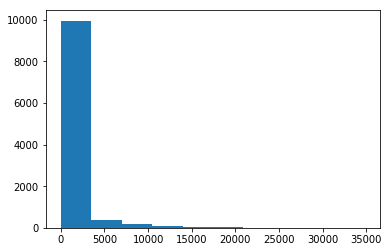

In [137]:
plt.hist(df.groupby(["ItemID"])["ItemID"].count())

### Presentación en forma matricial...

In [174]:
n_users = df.UserID.unique().shape[0]
n_users

69878

In [175]:
n_alt_items = max(df["ItemID"])
n_alt_items

65133

In [176]:
n_items = df.ItemID.unique().shape[0]
n_items

10677

In [177]:
ratings = np.zeros((n_users, n_items))    #ratings = np.zeros((n_users, n_items))

MemoryError: 

In [170]:
for row in df.itertuples():
    ratings[row[1] - 1, row[2] - 1] = row[3]

IndexError: index 27820 is out of bounds for axis 1 with size 10677

In [98]:
type(ratings)

numpy.ndarray

In [99]:
ratings.shape

(6040, 3952)

In [100]:
ratings

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [101]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}".format(sparsity))

Coeficiente de sparseidad: 4.19


## Conjuntos de entrenamiento y validación...

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.3, random_state = 42)

In [104]:
ratings_train.shape

(4228, 3952)

In [105]:
ratings_test.shape

(1812, 3952)

## Filtro colavorativo basado en usuarios...
* Matriz de similaridad entre los usuarios (diagrama del coseno).
* Predecir la valoración desconocida de un item *i* para un usuario activo *u* basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho item.
* Recomendamos los nuevos items a los usuarios según lo establecido en los pasos anteriores.

In [106]:
import numpy as np
import sklearn

In [107]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [108]:
type(sim_matrix)

numpy.ndarray

In [109]:
sim_matrix.shape

(4228, 4228)

In [110]:
sim_matrix

array([[1.        , 0.27711946, 0.06522843, ..., 0.21580576, 0.05108407,
        0.11246015],
       [0.27711946, 1.        , 0.10564975, ..., 0.13505376, 0.05363221,
        0.08458677],
       [0.06522843, 0.10564975, 1.        , ..., 0.        , 0.        ,
        0.01175469],
       ...,
       [0.21580576, 0.13505376, 0.        , ..., 1.        , 0.03472691,
        0.10706176],
       [0.05108407, 0.05363221, 0.        , ..., 0.03472691, 1.        ,
        0.01889604],
       [0.11246015, 0.08458677, 0.01175469, ..., 0.10706176, 0.01889604,
        1.        ]])

In [111]:
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis = 1)]).T
users_predictions

array([[1.70872967, 0.5181014 , 0.31134434, ..., 0.04115528, 0.02025986,
        0.29706505],
       [1.56024873, 0.4286439 , 0.23403698, ..., 0.03424183, 0.0198714 ,
        0.2613316 ],
       [1.47548675, 0.39907776, 0.31031876, ..., 0.05202387, 0.03497449,
        0.42620864],
       ...,
       [1.82502479, 0.67928303, 0.34963496, ..., 0.03583528, 0.01277722,
        0.26195874],
       [1.6656389 , 0.4778692 , 0.26390454, ..., 0.0389461 , 0.01956526,
        0.28299039],
       [1.9981301 , 0.54296682, 0.33994805, ..., 0.03666319, 0.01809949,
        0.27383572]])

In [112]:
def get_min_squared_error(preds, actuals):
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return sklearn.metrics.mean_squared_error(preds, actuals)

In [113]:
get_min_squared_error(users_predictions, ratings_train)

9.218363895868974

In [114]:
get_min_squared_error(users_predictions, ratings_test)

9.757674727739284

## Filtro colavorativo basado en los KNN...

In [115]:
from sklearn.neighbors import NearestNeighbors

In [116]:
k = 5

In [117]:
neighbors = NearestNeighbors(k, 'cosine')

In [118]:
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2,
         radius='cosine')

In [119]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance = True)

In [120]:
top_k_distances.shape

(4228, 5)

In [121]:
top_k_distances[0]

array([ 0.        , 60.99180273, 61.20457499, 61.4817046 , 61.87083319])

In [122]:
top_k_users.shape

(4228, 5)

In [123]:
top_k_users[0]

array([   0, 3710, 3466,  303, 2415], dtype=int64)

In [124]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):   ## para cada usuario del conjunto de entrenemiento.
    users_predicts_k[i, :] = top_k_distances[i].T.dot(ratings_train[top_k_users[i]]) / np.array([np.abs(top_k_distances[i].T).sum(axis = 0)]).T

In [125]:
users_predicts_k.shape

(4228, 3952)

In [126]:
users_predicts_k

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.01680388, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [127]:
get_min_squared_error(users_predicts_k, ratings_train)

9.268657809401276

In [128]:
get_min_squared_error(users_predicts_k, ratings_test)

12.663850745791173